In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/India_GDP_Data.csv')
df.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                61 non-null     int64  
 1   GDP_In_Billion_USD  61 non-null     float64
 2   Per_Capita_in_USD   61 non-null     int64  
 3   Percentage_Growth   61 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [ ]:
df.describe()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
count,61.000000,61.000000,61.000000,61.000000
mean,1991.000000,709.889016,611.163934,5.089344
std,17.752934,870.169692,618.757227,3.282711
min,1961.000000,39.230000,85.000000,-6.600000
25%,1976.000000,102.720000,163.000000,3.740000
50%,1991.000000,296.040000,346.000000,5.710000
75%,2006.000000,940.260000,807.000000,7.550000
max,2021.000000,3173.400000,2277.000000,9.630000


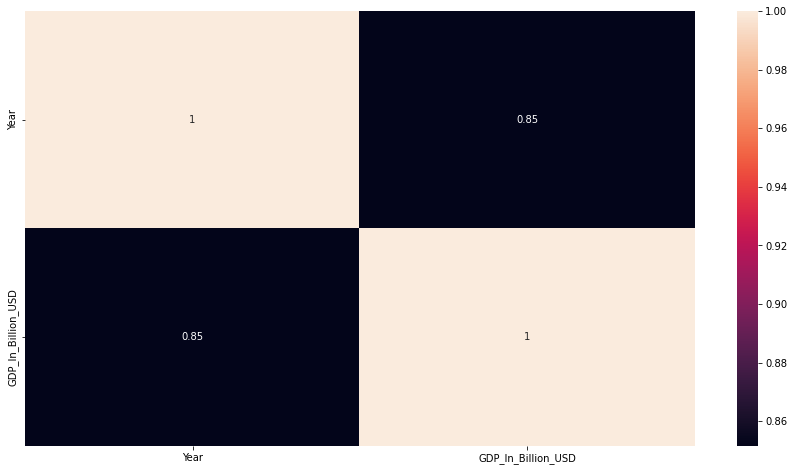

In [ ]:
plt.figure(figsize= (15,8))
cor = df.corr()
sns.heatmap(cor,annot=True)

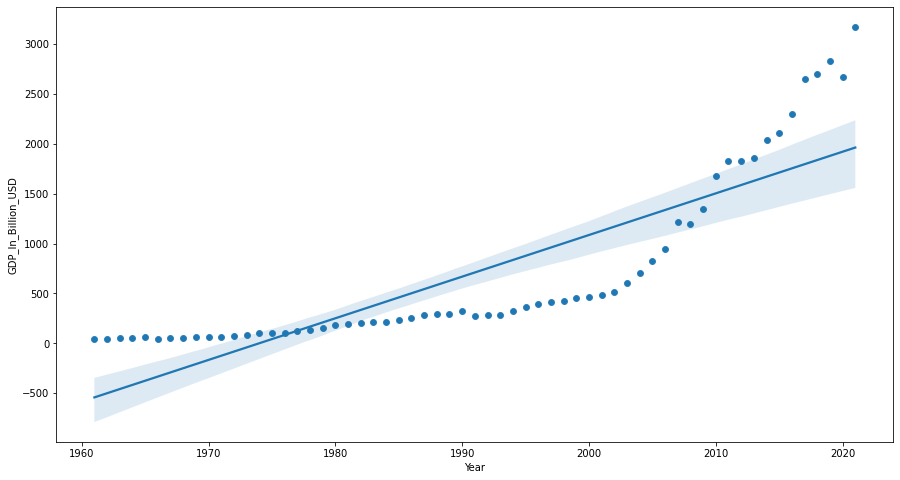

In [ ]:
plt.figure(figsize= (15,8))
sns.scatterplot(x=df['Year'], y= df['GDP_In_Billion_USD'])
sns.regplot(x=df['Year'], y= df['GDP_In_Billion_USD'])

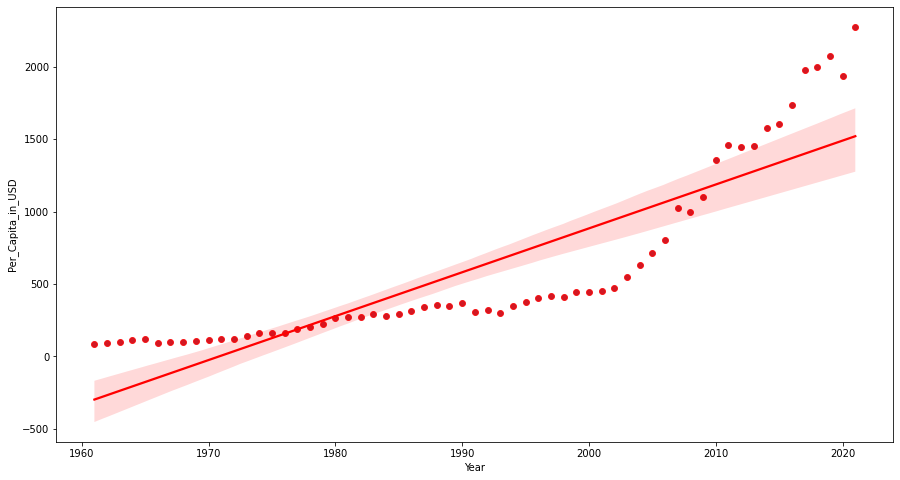

In [ ]:
plt.figure(figsize= (15,8))
sns.scatterplot(x=df['Year'], y= df['Per_Capita_in_USD'])
sns.regplot(x=df['Year'], y= df['Per_Capita_in_USD'], color = 'red')

In [ ]:
# Droping unwanted features
df.drop(['Percentage_Growth ','Per_Capita_in_USD'], axis = 1, inplace = True)

In [ ]:
# Define Independant and dependent features
x = df.drop('GDP_In_Billion_USD', axis = 1)
y = df['GDP_In_Billion_USD']
y=df.iloc[:,9]

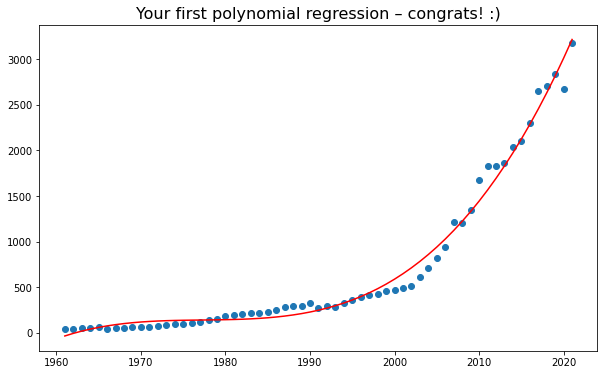

In [ ]:
# Model Training
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

In [ ]:
def model_eva(actual, predicated):
    mse = mean_squared_error(actual, predicated)
    print(f'Mean squared error is = {mse}')
    mae = mean_absolute_error(actual, predicated)
    print(f'Mean absolute error is = {mae}')
    print(f'Root Mean squared error is = {np.sqrt(mse)}')
    r2 = r2_score(actual, predicated)
    print(f'R2 score is = {r2}')

# Spliting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10, test_size=0.3)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
q=poly.fit(xtrain,ytrain)
# Training accuracy
y_predict = poly_reg_model.predict(x_train)
model_eva(y_train,y_predict)
y_predict = poly_reg_model.predict(x_test)
model_eva(y_test,y_predict)
print('Regularised model')

Mean squared error is = 10444.149081988315
Mean absolute error is = 72.01210015751067
Root Mean squared error is = 102.19661971899225
R2 score is = 0.9854459593871318
Mean squared error is = 7319.184621008286
Mean absolute error is = 65.48881018902127
Root Mean squared error is = 85.55223329059439
R2 score is = 0.9908876545905371
Regularised model


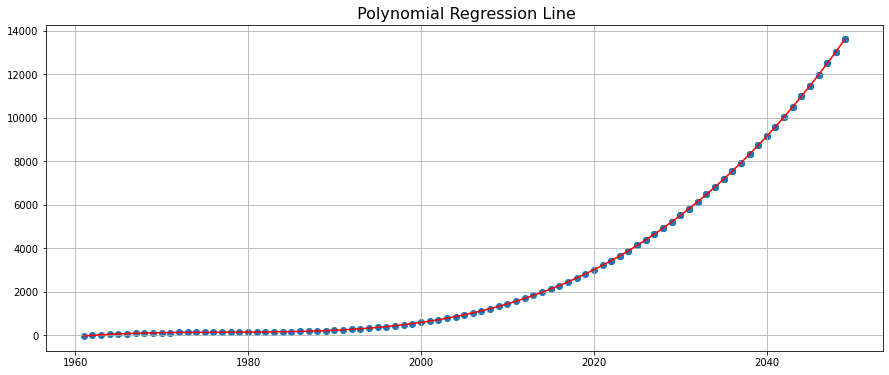

In [ ]:
def pre_new_point(start,end):
    year_list = np.arange(start,end)
    global x
    for i in range(start,end):
        x = x.append({'Year': i}, ignore_index=True)
    x = x.sort_values(by = 'Year', ascending = False)
    poly = PolynomialFeatures(degree=3, include_bias=False)
    x_new = poly.fit_transform(x)
    y_pre = poly_reg_model.predict(x_new)
    plt.figure(figsize=(15, 6))
    plt.title(" Polynomial Regression Line", size=16)
    plt.scatter(x, y_pre)
    plt.plot(x,y_pre, color ='Red')
    plt.grid()
    plt.show()
pre_new_point(2022,2050)